In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [267]:
df = pd.read_csv('covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [268]:
df['ObservationDate'] = df['ObservationDate'].astype('datetime64[ns]') 

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
SNo                6722 non-null int64
ObservationDate    6722 non-null datetime64[ns]
Province/State     3956 non-null object
Country/Region     6722 non-null object
Last Update        6722 non-null object
Confirmed          6722 non-null float64
Deaths             6722 non-null float64
Recovered          6722 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 420.2+ KB


In [270]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
1    2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
2    3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
3    4      2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
4    5      2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [271]:
current_date = '2020-03-10'
df2=df[df['ObservationDate'].eq(current_date)].groupby(['Country/Region'])['Confirmed'].sum().reset_index(name="sum").sort_values(by='sum',ascending=False).head(5)

<BarContainer object of 5 artists>

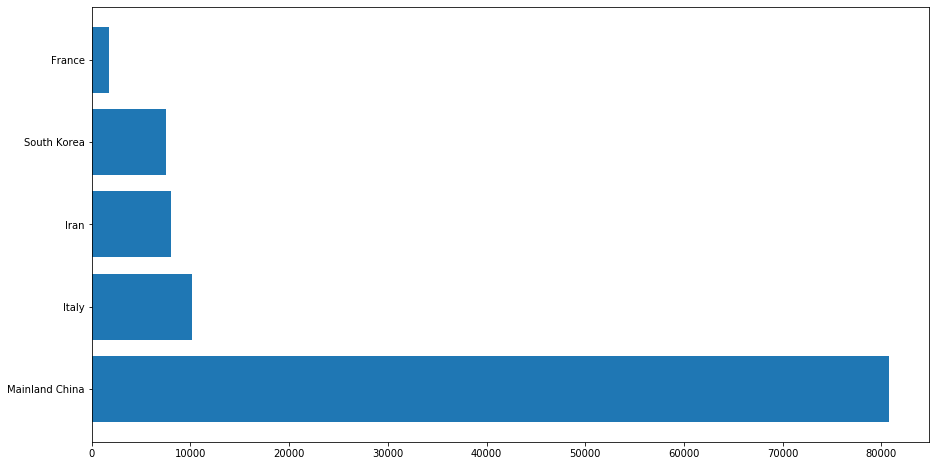

In [272]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df2['Country/Region'], df2['sum'])

Text(1, 0.25, '2020-03-10')

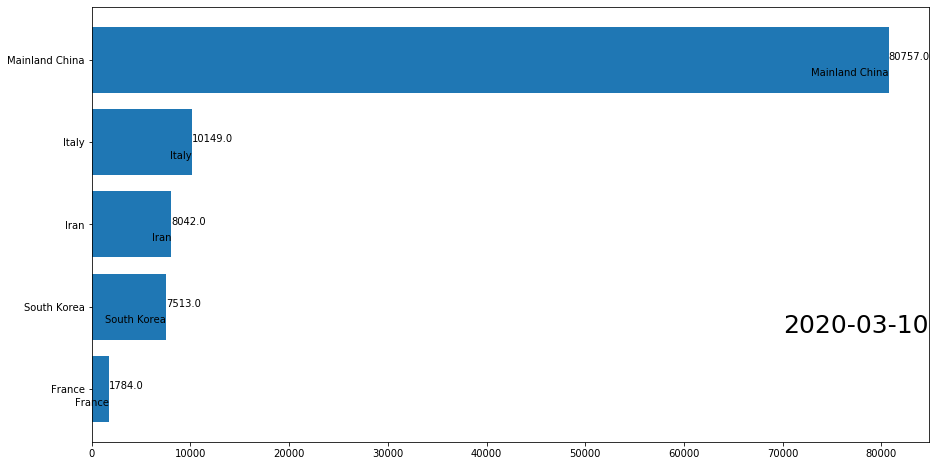

In [273]:
fig, ax = plt.subplots(figsize=(15, 8))
df2 = df2[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(df2['Country/Region'], df2['sum'])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (Confirmed, Country) in enumerate(zip(df2['sum'], df2['Country/Region'])):
    #ax.text(Confirmed, i+.20, Country, ha='right')  # Tokyo: name
    ax.text(Confirmed, i-0.20, Country, ha='right')  # Asia: group name
    ax.text(Confirmed, i, Confirmed, ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.25, current_date, transform=ax.transAxes, size=25, ha='right')

In [274]:
df['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

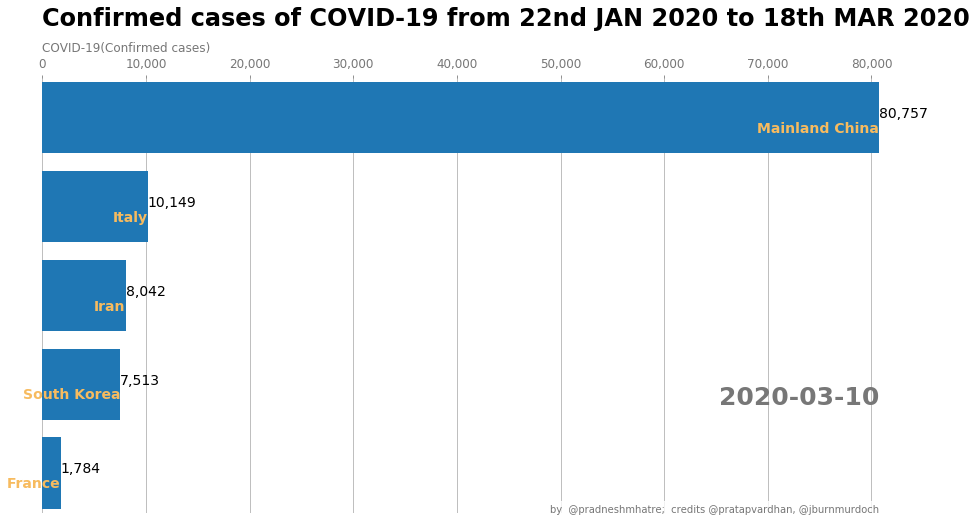

In [275]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(Date):
    dff=df[df['ObservationDate'].eq(Date)].groupby(['Country/Region'])['Confirmed'].sum().reset_index(name='sum').sort_values(by='sum',ascending=False).head(5)
    dff = dff[::-1] 
    ax.clear()
    ax.barh(dff['Country/Region'], dff['sum'])
    #dx = dff['sum'].max() / 200
    #dff = dff[::-1] 
    for i, (value, name) in enumerate(zip(dff['sum'], dff['Country/Region'])):
        #ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value, i-0.20, name ,size=14,weight=700, color='#f7bb5f', ha='right',va='bottom')
        ax.text(value, i,     f'{value:,.0f}',  size=14, ha='left',va='baseline')
    # ... polished styles
    ax.text(1, 0.25, Date, transform=ax.transAxes, color='#777777', size=25, ha='right', weight=800)
    ax.text(0, 1.06, 'COVID-19(Confirmed cases)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Confirmed cases of COVID-19 from 22nd JAN 2020 to 18th MAR 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by  @pradneshmhatre;  credits @pratapvardhan, @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart('2020-03-10')

In [276]:
start_date='2020-01-21'
end_date='2020-03-18'
pd.date_range(start_date, end_date)

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
      

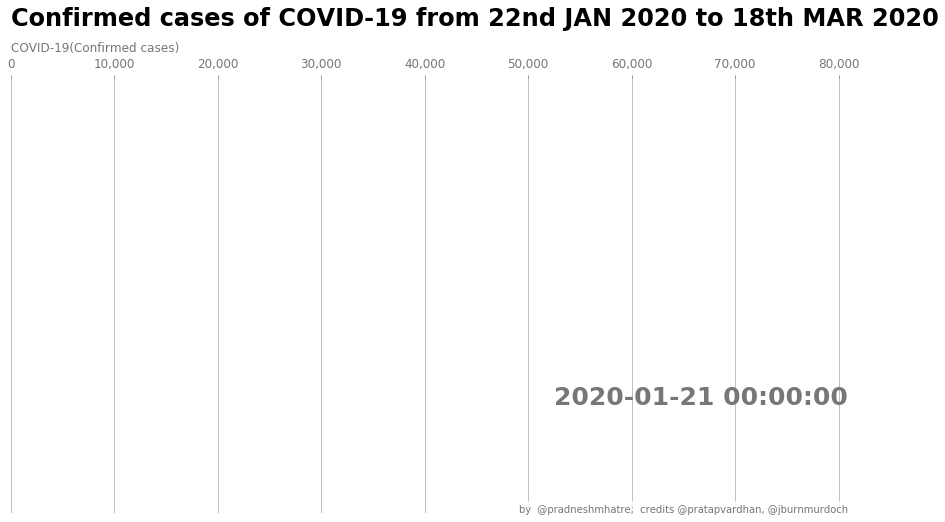

In [292]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(Date):
    dff=df[df['ObservationDate'].eq(Date)].groupby(['Country/Region'])['Confirmed'].sum().reset_index(name='sum').sort_values(by='sum',ascending=False).head(15)
    dff = dff[::-1] 
    ax.clear()
    ax.barh(dff['Country/Region'], dff['sum'])
    #dx = dff['sum'].max() / 200
    #dff = dff[::-1] 
    for i, (value, name) in enumerate(zip(dff['sum'], dff['Country/Region'])):
        #ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value, i-0.20, name ,size=14,weight=700, color='#f7bb5f', ha='right',va='bottom')
        ax.text(value, i,     f'{value:,.0f}',  size=14, ha='left',va='baseline')
    # ... polished styles
    ax.text(1, 0.25, Date, transform=ax.transAxes, color='#777777', size=25, ha='right', weight=800)
    ax.text(0, 1.06, 'COVID-19(Confirmed cases)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Confirmed cases of COVID-19 from 22nd JAN 2020 to 18th MAR 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by  @pradneshmhatre;  credits @pratapvardhan, @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start_date, end_date))
HTML(animator.to_jshtml()) 
#animator.to_html5_video('file.html')
# or use animator.to_html5_video() or animator.save()

In [294]:
#reference: https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41